# **Programa de Pós-Graduação em Computação - INF/UFRGS**



### Disciplina CMP263 - Aprendizagem de Máquina
#### *Profa. Mariana Recamonde-Mendoza (mrmendoza@inf.ufrgs.br)*
<br>

---
***Observação:*** *Este notebook é disponibilizado aos alunos como complemento às aulas  e aos slides preparados pela professora. Desta forma, os principais conceitos são apresentados no material teórico fornecido. O objetivo deste notebook é reforçar os conceitos e demonstrar questões práticas no uso de algoritmos e estratégias de avaliação em Aprendizado de Máquina.*


---

## **Tópico: Introdução à avaliação de modelos com Holdout**


**Objetivos da atividade:**
-  Entender o funcionamento da técnica de holdout para avaliação de modelos.
- Comparar o desempenho de dois algoritmos, Naive Bayes e KNN, em uma tarefa de classificação.
- Aplicar métricas de avaliação como acurácia, precisão, recall, observando a matriz de confusão.
- Implementar uma estratégia básica para seleção de hiperparâmetros para o KNN, interpretando os resultados.
- Analisar o impacto de aspectos como dimensão dos dados, aleatoriedade na divisão de dados e repetições na avaliação de modelos com Holdout.

### Carregando as bibliotecas e dados


In [1]:
%pip install numpy pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd             # biblioteca para análise de dados
import matplotlib.pyplot as plt # biblioteca para visualização de informações
import seaborn as sns           # biblioteca para visualização de informações
import numpy as np              # biblioteca para operações com arrays multidimensionais
from sklearn.datasets import load_breast_cancer ## conjunto de dados a ser analisado
sns.set()

In [3]:
## Carregando os dados - Câncer de Mama
## https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

data = load_breast_cancer() ## carrega os dados de breast cancer
X = data.data  # matriz contendo os atributos
y = data.target  # vetor contendo a classe (0 para maligno e 1 para benigno) de cada instância
feature_names = data.feature_names  # nome de cada atributo
target_names = data.target_names  # nome de cada classe

In [4]:
print(f"Dimensões de X: {X.shape}\n")
print(f"Dimensões de y: {y.shape}\n")
print(f"Nomes dos atributos: {feature_names}\n")
print(f"Nomes das classes: {target_names}")

Dimensões de X: (569, 30)

Dimensões de y: (569,)

Nomes dos atributos: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Nomes das classes: ['malignant' 'benign']


In [5]:
## transforma NumPy Array para Pandas DataFrame
data_df = pd.DataFrame(X,columns=feature_names)

## sumariza os atributos numéricos (todos, neste caso)
data_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Fazendo a divisão dos dados com Holdout de 3 vias (treino/validação/teste)

In [6]:
#Carregando funções específicas do scikit-learn

from sklearn.model_selection import train_test_split # função do scikit-learn que implementa um holdout
from sklearn.naive_bayes import GaussianNB # Naive Bayes Gaussiano
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report # métricas de desempenho
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # matriz de confusão

In [7]:
## Exemplo de HOLDOUT de 2 vias: separa os dados em treino e teste, de forma estratificada (não utilizado aqui)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y) ## atenção: inicialmente, não mude o random_state para este exercício

In [8]:
## HOLDOUT de 3 vias: separa os dados em treino e teste, de forma estratificada

## Definindo as proporções de treino, validação e teste.
train_ratio = 0.70
test_ratio = 0.15
validation_ratio = 0.15

## Fazendo a primeira divisão, para separar um conjunto de teste dos demais.
## Assuma X_temp e y_temp para os dados de treinamento+validação e X_test e y_test para os de teste
## Dica: configure o random_state para facilitar reprodutibilidade dos experimentos

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=test_ratio,random_state=42,stratify=y)

## Fazendo a segunda divisão, para gerar o conjunto de treino e validação a partir
## do conjunto de 'treinamento' da divisão anterior
## Assuma X_train e y_train para os dados de treinamento e X_valid e y_valid para os de teste
## Dica: configure o random_state para facilitar reprodutibilidade dos experimentos

X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=validation_ratio/(train_ratio+test_ratio),random_state=42,stratify=y_temp)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

(397, 30)
(86, 30)
(86, 30)



**>> Analise e Discuta:**



1. Considere um cenário com 5 instâncias no conjunto de treinamento e  95 instâncias no conjunto de teste. O quão boa você acha que é a capacidade de generalização do modelo que provavelmente treinaremos?

2. Sua resposta para 1 muda se tivermos 500 instâncias de treinamento e 9500 instâncias de teste?

3.  Considere um cenário com 95 instâncias no conjunto de treinamento e 5 instâncias no conjunto de teste. O valor de desempenho do teste ainda é uma boa estimativa do poder de generalização?

4. Sua resposta para 3 muda se tivermos 9500 instâncias de treinamento e 500 instâncias de teste?

---

#### Respostas

> 1. Considere um cenário com 5 instâncias no conjunto de treinamento e  95 instâncias no conjunto de teste. O quão boa você acha que é a capacidade de generalização do modelo que provavelmente treinaremos?

Péssima. A qualidade das predições está relácionado (mas não limitado) a:
- Quantidades de instâncias no conjunto de treinamento (quanto mais, melhor)
- Quantidade de atributos
- Complexidade do algorítmo
- Distribuição das classes nos conjuntos de treino e teste

Em um conjunto de treinamento pequeno, teríamos um dos extremos:
- Underfitting: Não tem dados suficientes para o modelo aprender a resolver o problema
- Overfitting: O treino resume-se a memorizar ruído. Incapaz de generalizar para novos casos.

> 2. Sua resposta para 1 muda se tivermos 500 instâncias de treinamento e 9500 instâncias de teste?

Certamente. O que interessa é a quantidade de dados necessários para resolver um problema. Adotar uma proporção entre instância de treinamento e teste sem um critério definido não produz benefícios.

Caso de uso:
- Utiliza-se um algorítmo simples para predição
- Generaliza rápido com poucas instâncias (logarítmico)
- Deseja-se uma forte avaliação de desempenho do modelo quando o erro "custa caro"

> 3.  Considere um cenário com 95 instâncias no conjunto de treinamento e 5 instâncias no conjunto de teste. O valor de desempenho do teste ainda é uma boa estimativa do poder de generalização?

Não, pois haveria chance de todas as instâncias conter dados repetidos do conjunto de treino. Isto prejudica avaliar o poder de generalização.  

> 4. Sua resposta para 3 muda se tivermos 9500 instâncias de treinamento e 500 instâncias de teste?

Sim. Esta divisão pode ser adequada para cenários de poucas classes que sejam fáceis de classificar.

### Pré-processamento: Normalizando os dados

A normalização é feita de forma a evitar **Data Leakage** (vazamento de informações dos dados de teste durante o treinamento dos modelos). Os parâmetros para normalização são estimados a partir dos dados de treino, e posteriormente aplicados para normalizar todos os dados, isto é, treino, validação e teste.

A normalização é imprescindível para algoritmos baseados em distâncias, como o kNN.

In [9]:
from sklearn.preprocessing import MinMaxScaler # função do scikit-learn que implementa normalização min-max

## O MinMaxScaler transformará os dados para que fiquem no intervalo [0,1] - importante para o kNN
scaler = MinMaxScaler()

## Iniciar a normalização dos dados. Primeiro fazer um 'fit' do scaler nos
## dados de treino. Esta etapa visa "aprender" os parâmetros para normalização.
## No caso do MinMaxScales, são os valores mínimos e máximos de cada atributo
scaler.fit(X_train)

## Aplicar a normalização nos três conjuntos de dados:
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

### Treinando um modelo Naïve Bayes Gaussiano (para dados numéricos)

In [10]:
# Treinar Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Classificar dados no conjunto de teste
y_pred_nb = nb_model.predict(X_test)

# Avaliar o desempenho
print("Naive Bayes - Desempenho no Conjunto de Teste")
print(f"Acurácia: {accuracy_score(y_test, y_pred_nb):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_nb):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_nb):.2f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_nb))

Naive Bayes - Desempenho no Conjunto de Teste
Acurácia: 0.94
Precision: 0.96
Recall: 0.94

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        32
           1       0.96      0.94      0.95        54

    accuracy                           0.94        86
   macro avg       0.94      0.94      0.94        86
weighted avg       0.94      0.94      0.94        86



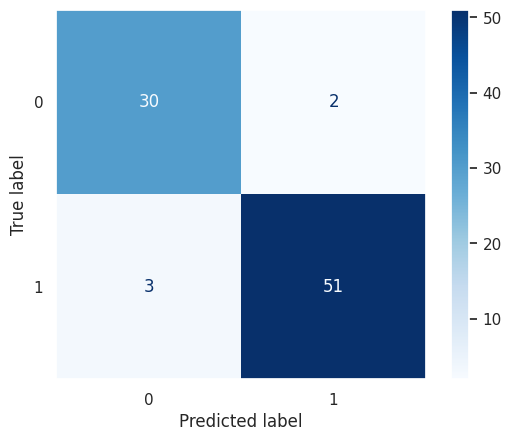

In [11]:
cm = confusion_matrix(y_test, y_pred_nb,labels=nb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_model.classes_)
disp = disp.plot(include_values=True, cmap='Blues', ax=None, xticks_rotation='horizontal')
plt.grid(False)
plt.show()

### Treinando um modelo kNN - com otimização do hiperparâmetro k

In [12]:
# Testar KNN com diferentes valores de k
# Conjunto de validação é usado para selecionar o melhor k
# Conjunto de teste é usado para avaliação final do modelo otimizado

# A análise é feita com a distância Euclidiana (padrão)
best_k = 1
best_score = 0

for k in range(1, 17,2):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    # Classificar dados no conjunto de teste
    y_pred_valid = knn_model.predict(X_valid)

    # Acurácia no conjunto de validação
    score = accuracy_score(y_valid, y_pred_valid)
    print(f"K={k}: Acurácia na Validação = {score:.2f}")

    if score > best_score:
        best_score = score
        best_k = k

print(f"\nMelhor valor de K: {best_k} com Acurácia de {best_score:.2f} na Validação")

K=1: Acurácia na Validação = 0.97
K=3: Acurácia na Validação = 0.97
K=5: Acurácia na Validação = 0.98
K=7: Acurácia na Validação = 0.98
K=9: Acurácia na Validação = 0.98
K=11: Acurácia na Validação = 0.98
K=13: Acurácia na Validação = 0.98
K=15: Acurácia na Validação = 0.98

Melhor valor de K: 5 com Acurácia de 0.98 na Validação


In [13]:
# Avaliação final do KNN com o melhor k
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train) ## o ideal seria unir treino+validação neste treinamento, mas para fins de comparação entre modelos knn/NB mantive apenas X_train

# Classificar dados no conjunto de teste
y_pred_knn = knn_model.predict(X_test)

print(f"\nKNN - Desempenho com K={best_k} no Conjunto de Teste")
print(f"Acurácia: {accuracy_score(y_test, y_pred_knn):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.2f}")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_knn))


KNN - Desempenho com K=5 no Conjunto de Teste
Acurácia: 0.97
Precision: 0.96
Recall: 0.98

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.96      0.98      0.97        54

    accuracy                           0.97        86
   macro avg       0.97      0.96      0.96        86
weighted avg       0.97      0.97      0.96        86



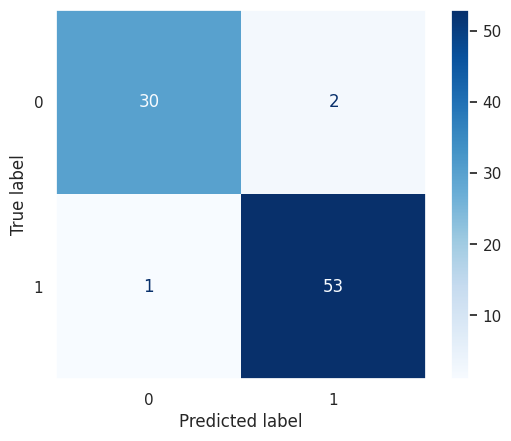

In [14]:
cm = confusion_matrix(y_test, y_pred_knn,labels=knn_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
disp = disp.plot(include_values=True, cmap='Blues', ax=None, xticks_rotation='horizontal')
plt.grid(False)
plt.show()

**>> Analise e Discuta:**

Com base nos resultados, qual dos dois modelos apresentou melhor desempenho geral no conjunto de teste, Naïve Bayes ou kNN?
Em quais classes o kNN obteve melhor sensibilidade (recall) e precisão do que o Naive Bayes, ou vice versa?

---

#### Respostas

> Com base nos resultados, qual dos dois modelos apresentou melhor desempenho geral no conjunto de teste, Naïve Bayes ou kNN?

> Em quais classes o kNN obteve melhor sensibilidade (recall) e precisão do que o Naive Bayes, ou vice versa?

O modelo KNN em que K=5 obteve melhor precisão e recall ao inferir a classe 1 (Benigno) em relação ao Naive Bayes

### Analisando o impacto da divisão aleatória de dados no desempenho dos modelos




Iteração 1: Random State=717, Acurácia=0.95
Iteração 2: Random State=945, Acurácia=0.95
Iteração 3: Random State=953, Acurácia=0.99
Iteração 4: Random State=385, Acurácia=0.96
Iteração 5: Random State=392, Acurácia=0.96
Iteração 6: Random State=975, Acurácia=0.98
Iteração 7: Random State=209, Acurácia=0.95
Iteração 8: Random State=349, Acurácia=0.97
Iteração 9: Random State=969, Acurácia=0.96
Iteração 10: Random State=138, Acurácia=0.97
Iteração 11: Random State=84, Acurácia=0.98
Iteração 12: Random State=910, Acurácia=0.96
Iteração 13: Random State=315, Acurácia=0.97
Iteração 14: Random State=691, Acurácia=0.97
Iteração 15: Random State=74, Acurácia=0.95
Iteração 16: Random State=571, Acurácia=0.95
Iteração 17: Random State=871, Acurácia=0.96
Iteração 18: Random State=166, Acurácia=0.96
Iteração 19: Random State=317, Acurácia=0.96
Iteração 20: Random State=589, Acurácia=0.96
Iteração 21: Random State=127, Acurácia=0.95
Iteração 22: Random State=393, Acurácia=0.97
Iteração 23: Random S

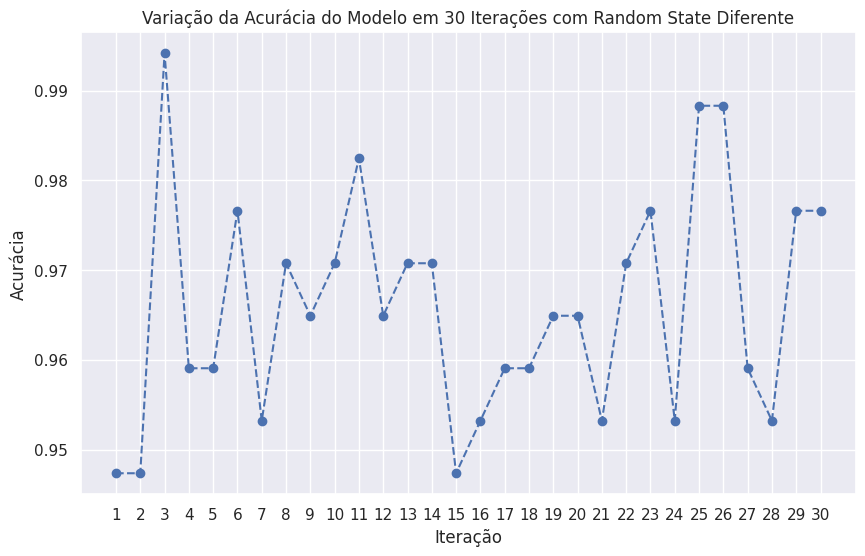

In [15]:
# Inicializar listas para armazenar os resultados
accuracies = []
random_states = []

# Avaliar modelos (naïve Bayes/kNN) 30 vezes, variando o random_state
for i in range(30):
    random_state = np.random.randint(0, 1000)  # Gerar um random_state aleatório
    random_states.append(random_state)

    # Dividir os dados entre treino e teste (proporção fixa)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

    # Normalizar dados
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    # # Treinar o Naive Bayes
    # nb_model = GaussianNB()
    # nb_model.fit(X_train, y_train)

    # # Classificação e avaliação no conjunto de teste
    # y_pred_nb = nb_model.predict(X_test)
    # accuracy = accuracy_score(y_test, y_pred_nb)
    # accuracies.append(accuracy)

    # Treinar o kNN
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)

    # Classificação e avaliação no conjunto de teste
    y_pred_knn = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_knn)
    accuracies.append(accuracy)


    # Exibir o desempenho a cada iteração
    print(f"Iteração {i+1}: Random State={random_state}, Acurácia={accuracy:.2f}")

# Plotar a variação das acurácias
plt.figure(figsize=(10,6))
plt.plot(range(1, 31), accuracies, marker='o', linestyle='--', color='b')
plt.title('Variação da Acurácia do Modelo em 30 Iterações com Random State Diferente')
plt.xlabel('Iteração')
plt.ylabel('Acurácia')
plt.xticks(range(1, 31))
plt.grid(True)
plt.show()

In [16]:
# Amplitude dos resultados
max(accuracies) - min(accuracies)

0.04678362573099415

**>> Analise e Discuta:**

Observe a variação do valor de *random_state* na divisão dos dados e os respectivos resultados do desempenho na classificação. Como isso afeta os resultados?  Explique o impacto de diferentes divisões dos dados de treino/validação/teste no desempenho dos modelos. Por que é importante repetir os experimentos várias vezes, variando o random_state? O que a repetição traz em termos de confiabilidade dos resultados?

---

#### Respostas

> Observe a variação do valor de *random_state* na divisão dos dados e os respectivos resultados do desempenho na classificação. Como isso afeta os resultados? Explique o impacto de diferentes divisões dos dados de treino/validação/teste no desempenho dos modelos.

O exemplo demonstra que o treino de um modelo está sujeito à vies introduzido por amostragem de dados. Diferentes ***random_states*** podem gerar divisões com distribuições de classes ou características distintas. Isto pode favorecer ou penalizar o modelo dependendo da sua "sorte" na amostragem. Os algorítmos podem apresentar uma progressão de aprendizado:

- Gulosa: Rápido aprendizado nas primeiras instâncias. Podem estabilizar cedo demais e deixam de explorar oportunidades de melhoria.
- Conservadora: Demoram para convergir para um resultado satisfatório. Demanda mais instâncias para treinar. Busca por um resultado ótimo.

Portanto, um modelo pode obter um excelente resultado na validação, porém um desempenho inferior no teste final. 

> Por que é importante repetir os experimentos várias vezes, variando o random_state? O que a repetição traz em termos de confiabilidade dos resultados?

Ao repetir experimentos, embaralhando as condições iniciais dos conjuntos de dados, estamos testando a maturidade do processo de desenvolvimento utilizado para construir o modelo. Isto responde questionamentos como:

- Escolhemos o algorítmo correto para o problema de domínio?
- O quão robusto é o modelo frente ao viés no conjunto de dados?
- Precisamos realizar algum ajuste / mitigação no modelo?

Repetir os experimentos permite obter uma estimativa mais confiável do desempenho médio do modelo.


### Analisando o impacto do tamanho do conjunto de teste na avaliação de desempenho dos modelos



Tamanho do Conjunto de Teste: 5.0%
   Média da Acurácia: 0.968
   Variância: 0.00087
   Amplitude (Máx - Mín): 0.103

Tamanho do Conjunto de Teste: 10.0%
   Média da Acurácia: 0.972
   Variância: 0.00050
   Amplitude (Máx - Mín): 0.088

Tamanho do Conjunto de Teste: 15.0%
   Média da Acurácia: 0.963
   Variância: 0.00024
   Amplitude (Máx - Mín): 0.058

Tamanho do Conjunto de Teste: 20.0%
   Média da Acurácia: 0.968
   Variância: 0.00018
   Amplitude (Máx - Mín): 0.061

Tamanho do Conjunto de Teste: 25.0%
   Média da Acurácia: 0.965
   Variância: 0.00023
   Amplitude (Máx - Mín): 0.077

Tamanho do Conjunto de Teste: 30.0%
   Média da Acurácia: 0.965
   Variância: 0.00016
   Amplitude (Máx - Mín): 0.064

Tamanho do Conjunto de Teste: 35.0%
   Média da Acurácia: 0.965
   Variância: 0.00015
   Amplitude (Máx - Mín): 0.040

Tamanho do Conjunto de Teste: 40.0%
   Média da Acurácia: 0.966
   Variância: 0.00009
   Amplitude (Máx - Mín): 0.035

Tamanho do Conjunto de Teste: 45.0%
   Média da A

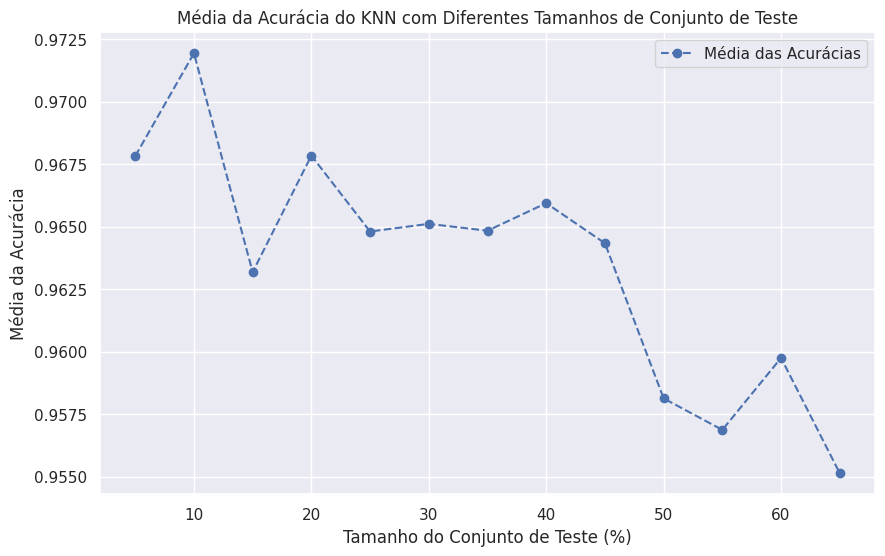

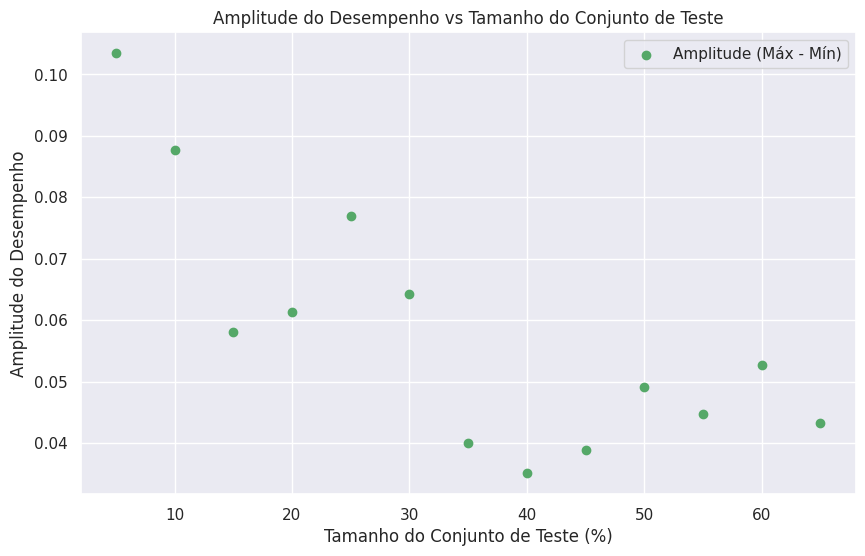

In [17]:
# Inicializar listas para armazenar resultados
variances = []
amplitudes = []
avg_accuracies = []

# Definir as proporções de conjunto de teste
test_sizes = np.arange(0.05, 0.70, 0.05)

# Loop para cada proporção de conjunto de teste
for test_size in test_sizes:
    accuracies = []

    # Repetir o experimento 30 vezes para cada tamanho de conjunto de teste
    for i in range(30):
        random_state = np.random.randint(0, 1000)

        # Dividir os dados com a proporção especificada para o conjunto de teste
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

        # Normalizar dados
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # # Treinar o Naive Bayes
        # nb_model = GaussianNB()
        # nb_model.fit(X_train, y_train)

        # # Previsão e avaliação no conjunto de teste
        # y_pred_nb = nb_model.predict(X_test)
        # accuracy = accuracy_score(y_test, y_pred_nb)
        # accuracies.append(accuracy)

        # Treinar o kNN
        knn_model = KNeighborsClassifier(n_neighbors=5)
        knn_model.fit(X_train, y_train)

        # Previsão e avaliação no conjunto de teste
        y_pred_knn = knn_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred_knn)
        accuracies.append(accuracy)

    # Calcular variância, amplitude e média dos desempenhos
    variance = np.var(accuracies)
    amplitude = np.max(accuracies) - np.min(accuracies)
    avg_accuracy = np.mean(accuracies)

    # Armazenar os resultados
    variances.append(variance)
    amplitudes.append(amplitude)
    avg_accuracies.append(avg_accuracy)

    # Exibir os resultados intermediários
    print(f"Tamanho do Conjunto de Teste: {test_size*100:.1f}%")
    print(f"   Média da Acurácia: {avg_accuracy:.3f}")
    print(f"   Variância: {variance:.5f}")
    print(f"   Amplitude (Máx - Mín): {amplitude:.3f}")
    print("")

# Gráfico: Variação da Acurácia com Diferentes Tamanhos de Conjunto de Teste
plt.figure(figsize=(10,6))
plt.plot(test_sizes * 100, avg_accuracies, marker='o', linestyle='--', color='b', label="Média das Acurácias")
plt.title('Média da Acurácia do KNN com Diferentes Tamanhos de Conjunto de Teste')
plt.xlabel('Tamanho do Conjunto de Teste (%)')
plt.ylabel('Média da Acurácia')
plt.grid(True)
plt.legend()
plt.show()

# # Gráfico: Variância vs Tamanho do Conjunto de Teste
# plt.figure(figsize=(10,6))
# plt.scatter(test_sizes * 100, variances, color='r', label="Variância do Desempenho")
# plt.title('Variância do Desempenho vs Tamanho do Conjunto de Teste')
# plt.xlabel('Tamanho do Conjunto de Teste (%)')
# plt.ylabel('Variância do Desempenho')
# plt.grid(True)
# plt.legend()
# plt.show()

# Gráfico: Amplitude vs Tamanho do Conjunto de Teste
plt.figure(figsize=(10,6))
plt.scatter(test_sizes * 100, amplitudes, color='g', label="Amplitude (Máx - Mín)")
plt.title('Amplitude do Desempenho vs Tamanho do Conjunto de Teste')
plt.xlabel('Tamanho do Conjunto de Teste (%)')
plt.ylabel('Amplitude do Desempenho')
plt.grid(True)
plt.legend()
plt.show()

**>> Analise e Discuta:**

Conforme o tamanho do conjunto de teste aumenta, como muda a variância no desempenho do modelo? Por que esse comportamento ocorre? Ao comparar a amplitude (diferença entre o máximo e o mínimo) do desempenho em diferentes tamanhos de conjunto de teste, o que você observa? Qual é a relação entre o tamanho do teste e a amplitude dos resultados?

Se a variância dos resultados de acurácia for muito alta, o que isso pode indicar sobre o seu modelo ou sobre a forma como os dados estão sendo divididos?

---

#### Respostas

> Conforme o tamanho do conjunto de teste aumenta, como muda a variância no desempenho do modelo? Por que esse comportamento ocorre? 

A variância no desempenho do modelo diminuí a medida que o tamanho do conjunto de teste aumenta. Isto ocorre devido a quantidade de instâncias disponíveis, permitindo testar a capacidade de generalização do modelo para dados desconhecidos.

> Ao comparar a amplitude (diferença entre o máximo e o mínimo) do desempenho em diferentes tamanhos de conjunto de teste, o que você observa? 

A amplitude tende a ser maior em conjuntos de testes pequenos, menor em conjuntos grandes.

> Qual é a relação entre o tamanho do teste e a amplitude dos resultados?

A amplitude dos resultados é inversamente proporcional ao tamanho do teste. Baixa amplitude e variância representam estabilidade e confiança na avaliação de desempenho do modelo.

> Se a variância dos resultados de acurácia for muito alta, o que isso pode indicar sobre o seu modelo ou sobre a forma como os dados estão sendo divididos?

Significa que o modelo possui ótimo desempenho para alguns conjuntos de teste, porém péssimo para outros. São sinais que indicam:

- Poucos dados para avaliar o desempenho do modelo
- Sensiblidade do modelo ao viés de particionamento
- Potêncial desbalanceamento de classe no particionamento dos dados

### Analisando o impacto do tamanho do conjunto de treino na avaliação de desempenho dos modelos



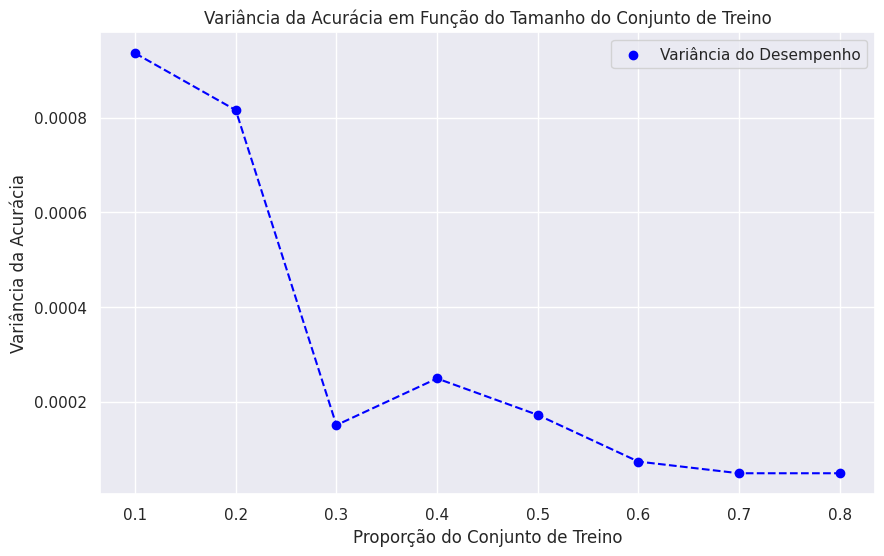

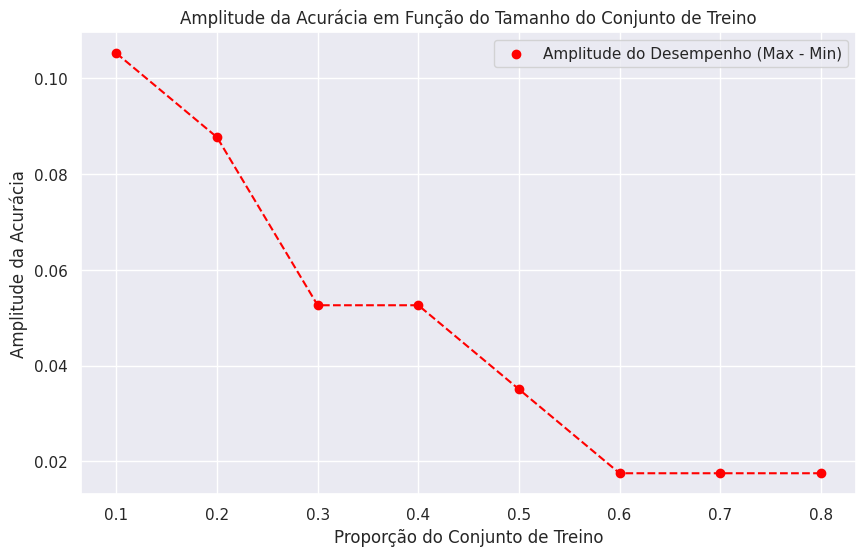

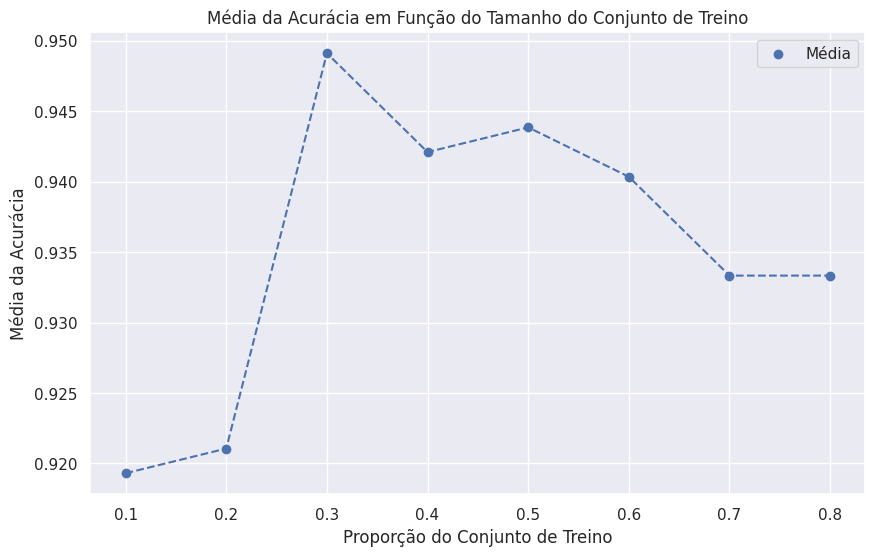

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Função para rodar o KNN com diferentes tamanhos de treino
def run_knn_analysis(X, y, test_size=0.1, train_sizes=[0.1, 0.2, 0.3, 0.4, 0.50, 0.6, 0.7, 0.8], iterations=10):
    results = {}

    # Fixando o conjunto de teste
    X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Criando o objeto de normalização
    scaler = StandardScaler()
    scaler.fit(X_train_full)

    # Normalizando o conjunto de teste
    X_test = scaler.transform(X_test)

    for train_size in train_sizes:
        accuracies = []
        for _ in range(iterations):
            # Amostrando um conjunto de treino de tamanho variável
            X_train_sample, _, y_train_sample, _ = train_test_split(
                X_train_full, y_train_full, train_size=train_size, random_state=None
            )

            # Normalizando o conjunto de treino amostrado
            X_train_sample = scaler.transform(X_train_sample)

            # Treinar o kNN
            knn_model = KNeighborsClassifier(n_neighbors=5)
            knn_model.fit(X_train_sample, y_train_sample)

            # Classificação e avaliação no conjunto de teste fixo
            y_pred_knn = knn_model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred_knn)
            accuracies.append(accuracy)

        # Calculando estatísticas do desempenho
        variance = np.var(accuracies)
        amplitude = np.max(accuracies) - np.min(accuracies)
        average = np.mean(accuracies)

        results[train_size] = {
            'accuracies': accuracies,
            'variance': variance,
            'amplitude': amplitude,
            'average': average
        }

    return results

# Exemplo de uso
variances = []
amplitudes = []
averages = []
train_sizes = [0.1, 0.2, 0.3, 0.4, 0.50, 0.6, 0.7, 0.8]

results = run_knn_analysis(X, y)

for train_size, metrics in results.items():
    variances.append(metrics['variance'])
    amplitudes.append(metrics['amplitude'])
    averages.append(metrics['average'])

# Gráfico de variância vs tamanho do conjunto de treino
plt.figure(figsize=(10, 6))
plt.scatter(train_sizes, variances, c='blue', label='Variância do Desempenho')
plt.plot(train_sizes, variances, color='blue', linestyle='--')
plt.xlabel('Proporção do Conjunto de Treino')
plt.ylabel('Variância da Acurácia')
plt.title('Variância da Acurácia em Função do Tamanho do Conjunto de Treino')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de amplitude vs tamanho do conjunto de treino
plt.figure(figsize=(10, 6))
plt.scatter(train_sizes, amplitudes, c='red', label='Amplitude do Desempenho (Max - Min)')
plt.plot(train_sizes, amplitudes, color='red', linestyle='--')
plt.xlabel('Proporção do Conjunto de Treino')
plt.ylabel('Amplitude da Acurácia')
plt.title('Amplitude da Acurácia em Função do Tamanho do Conjunto de Treino')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de média vs tamanho do conjunto de treino
plt.figure(figsize=(10, 6))
plt.scatter(train_sizes, averages, c='b', label='Média')
plt.plot(train_sizes, averages, color='b', linestyle='--')
plt.xlabel('Proporção do Conjunto de Treino')
plt.ylabel('Média da Acurácia')
plt.title('Média da Acurácia em Função do Tamanho do Conjunto de Treino')
plt.legend()
plt.grid(True)
plt.show()

**>> Analise e Discuta:**

Mantendo o conjunto de teste fixo, que mudança ou tendência observamos no desempenho dos modelos conforme mais dados de treino são utilizados? Como a amplitude (diferença entre o máximo e o mínimo) do desempenho varia com o tamanho do conjunto de treino? O que isso nos diz sobre a confiabilidade do modelo com tamanhos pequenos de conjunto de treino?

---

#### Respostas

> Mantendo o conjunto de teste fixo, que mudança ou tendência observamos no desempenho dos modelos conforme mais dados de treino são utilizados?

Observa-se que o desempenho aumenta proporcional a quantidade de dados adicionadas ao conjunto de treinamento

> Como a amplitude (diferença entre o máximo e o mínimo) do desempenho varia com o tamanho do conjunto de treino?

Tanto a amplitude quanto a variância diminuem ao passo que o conjunto de treino aumenta, sinalizando a estabilização do sistema.

> O que isso nos diz sobre a confiabilidade do modelo com tamanhos pequenos de conjunto de treino?

Baixa confiabilidade para modelos com poucas instâncias de treino disponíveis. O resultado é um underfit, pois o modelo não conseguiu aprender a resolver o problema de domínio e precisa de mais amostras para melhorar sua precisão.


# Finalização da tarefa

Sumarize as suas análises e conclusões em um documento word ou PDF (inserindo as respectivas perguntas propostas), e envie no Moodle.